In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [2]:
kids = h5py.File('/global/cfs/cdirs/lsst/groups/WL/projects/txpipe-sys-tests/kids/kids1000_psf_catalog.h5')

In [3]:
kids['stars'].keys()

<KeysViewHDF5 ['calib_psf_reserved', 'calib_psf_used', 'dec', 'extendedness', 'fov_x', 'fov_y', 'measured_T', 'measured_e1', 'measured_e2', 'model_T', 'model_e1', 'model_e2', 'ra']>

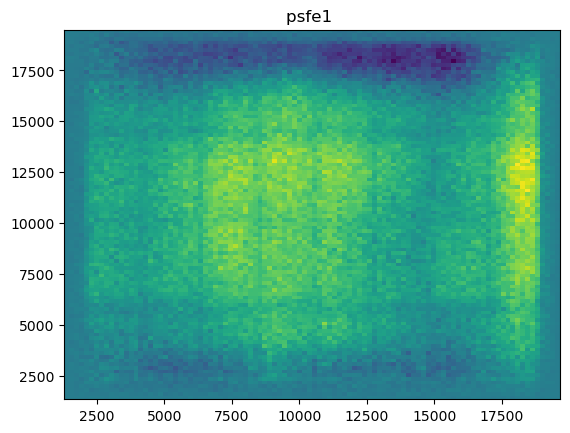

In [4]:
plt.hist2d(kids['stars/fov_x'][:],kids['stars/fov_y'],bins=(100,100),weights=kids['stars/measured_e1'][:])
plt.title('psfe1 ')
plt.show()

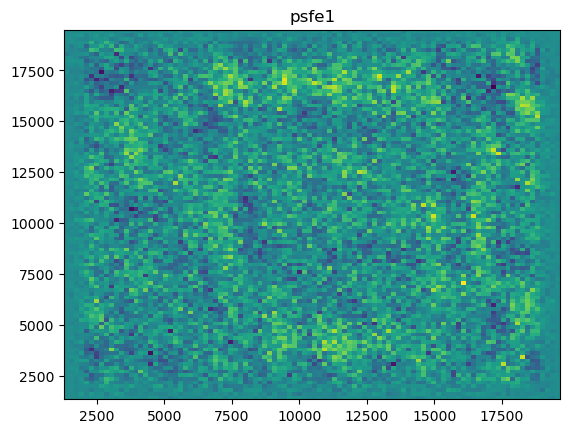

In [5]:
plt.hist2d(kids['stars/fov_x'][:],kids['stars/fov_y'],bins=(100,100),weights=kids['stars/measured_e1'][:]-kids['stars/model_e1'][:])
plt.title('psfe1')
plt.show()

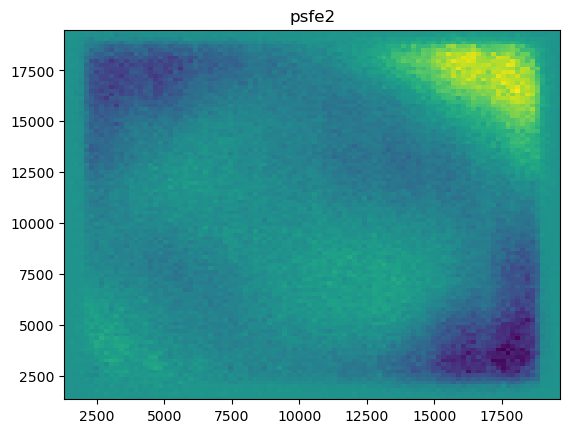

In [6]:
plt.hist2d(kids['stars/fov_x'][:],kids['stars/fov_y'],bins=(100,100),
           weights=kids['stars/measured_e2'][:])
plt.title('psfe2')
plt.show()

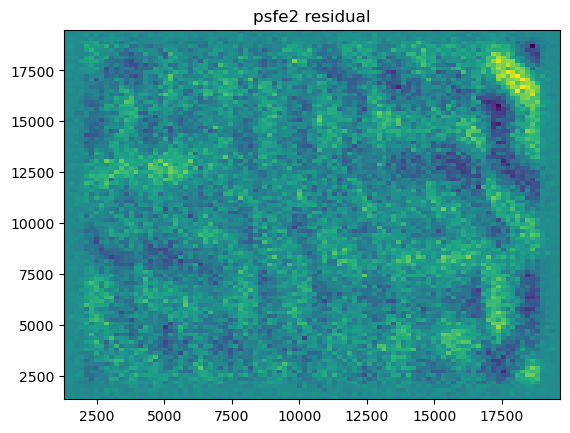

In [7]:
plt.hist2d(kids['stars/fov_x'][:],kids['stars/fov_y'],bins=(100,100),
           weights=kids['stars/measured_e2'][:]-kids['stars/model_e2'][:])
plt.title('psfe2 residual')
plt.show()

In [102]:
e1 = kids['stars/measured_e1'][:]
e2 = kids['stars/measured_e2'][:]
de1 = e1 - kids['stars/model_e1'][:]
de2 = e2 - kids['stars/model_e2'][:]
fov_x = kids['stars/fov_x'][:]
fov_y = kids['stars/fov_y'][:]

weights = [e1,de1,e2,de2]

labels = [r'e$_1$',r'e$_2$',r'res',r'res'] #[$\times 10$]

In [79]:
print(np.min(e1),np.max(e1))
print(np.min(e2),np.max(e2))
print(np.min(de1),np.max(de1))
print(np.min(de2),np.max(de2))

-0.1785389930009842 0.24448299407958984
-0.2146649956703186 0.20293700695037842
-0.13368099927902222 0.16477499902248383
-0.13296100497245789 0.12762700021266937


In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
for i,w,l in zip(range(1,5),weights,labels):
    plt.subplot(2,2,i)
    H, _, _= np.histogram2d(fov_x, fov_y, bins=(100,100), weights=w)
    im = plt.imshow(H,cmap='PuOr')
    plt.ylabel(l)
    plt.xticks([])
    plt.yticks([])
            
plt.subplots_adjust(left=0.1,right=0.9)
cax = plt.axes([0.9, 0.15, 0.05, 0.7])
plt.colorbar(im,cax=cax)


In [40]:
import numpy as np

from matplotlib.colors import Normalize
import matplotlib.pyplot as plt
import matplotlib.cm as cm


cmap=cm.seismic


In [103]:
Hnorm = []
for w in weights:
    H, _, _= np.histogram2d(fov_x, fov_y, bins=(100,100), weights=w,density=True)
    Hnorm.append(H)
    
vmin = min(h.min() for h in Hnorm)
vmax = max(h.max() for h in Hnorm)
norm = Normalize(vmin=vmin, vmax=vmax)

Text(0.5, 0.98, 'KiDS, normalized, density=True')

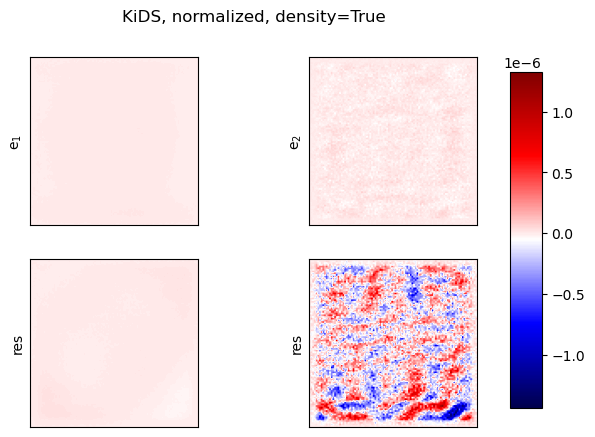

In [104]:
for i,w,l in zip(range(1,5),weights,labels):
    plt.subplot(2,2,i)
    H, _, _= np.histogram2d(fov_x, fov_y, bins=(100,100), weights=w,density=True)
    im = plt.imshow(H,cmap=cmap,norm=norm)#, vmin=-10, vmax=10)
    plt.ylabel(l)
    plt.xticks([])
    plt.yticks([])
plt.subplots_adjust(left=0.1,right=0.9)
cax = plt.axes([0.9, 0.15, 0.05, 0.7])
plt.colorbar(im,cax=cax)
plt.suptitle('KiDS, normalized, density=True')

In [44]:
y1 = h5py.File('/global/cfs/cdirs/lsst/groups/WL/projects/txpipe-sys-tests/des-y1/DES_psf_catalog.hdf5','r')



In [105]:
e1 = y1['stars/measured_e1'][:]
e2 = y1['stars/measured_e2'][:]
de1 = e1 - y1['stars/model_e1'][:]
de2 = e2 - y1['stars/model_e2'][:]
fov_x = y1['stars/fov_x'][:]
fov_y = y1['stars/fov_y'][:]

weights = [e1,e2,de1,de2]

labels = [r'e$_1$',r'e$_2$',r'res',r'res'] #[$\times 10$]

In [106]:
Hnorm = []
for w in weights:
    H, _, _= np.histogram2d(fov_x, fov_y, bins=(100,100), weights=w,density=True)
    Hnorm.append(H)
    
vmin = min(h.min() for h in Hnorm)
vmax = max(h.max() for h in Hnorm)
norm = Normalize(vmin=vmin, vmax=vmax)

/tmp/ipykernel_216168/304856054.py:5: RuntimeWarning: invalid value encountered in divide
  im = plt.imshow(Hw/H,cmap=cmap)#,norm=norm)#, vmin=-10, vmax=10)


Text(0.5, 0.98, "DES, normalized via chihway's suggestion")

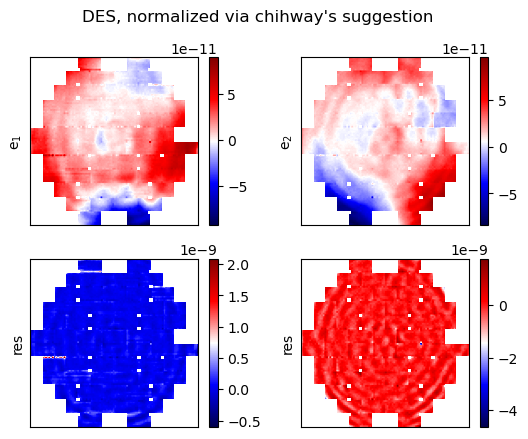

In [108]:

for i,w,l in zip(range(1,5),weights,labels):
    plt.subplot(2,2,i)
    Hw, _, _= np.histogram2d(fov_x, fov_y, bins=(100,100), weights=w,density=True)
    H, _, _= np.histogram2d(fov_x, fov_y, bins=(100,100))
    im = plt.imshow(Hw/H,cmap=cmap)#,norm=norm)#, vmin=-10, vmax=10)
    plt.ylabel(l)
    plt.xticks([])
    plt.yticks([])
    plt.colorbar(im)
    
plt.suptitle("DES, normalized via chihway's suggestion")

#plt.subplots_adjust(left=0.1,right=0.9)
#cax = plt.axes([0.9, 0.15, 0.05, 0.7])
#plt.colorbar(im,cax=cax)


Text(0.5, 0.98, 'normalized, density=True')

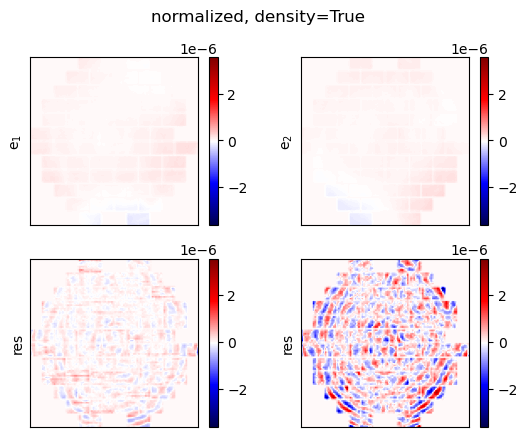

In [94]:
Hnorm = []
for w in weights:
    H, _, _= np.histogram2d(fov_x, fov_y, bins=(100,100), weights=w,density=True)
    Hnorm.append(H)
    
vmin = min(h.min() for h in Hnorm)
vmax = max(h.max() for h in Hnorm)
norm = Normalize(vmin=vmin, vmax=vmax)

for i,w,l in zip(range(1,5),weights,labels):
    plt.subplot(2,2,i)
    H, _, _= np.histogram2d(fov_x, fov_y, bins=(100,100), weights=w,density=True)
    im = plt.imshow(H,cmap=cmap,norm=norm)#, vmin=-10, vmax=10)
    plt.ylabel(l)
    plt.xticks([])
    plt.yticks([])
    plt.colorbar(im)
    
plt.suptitle("normalized, density=True")

Text(0.5, 0.98, 'normalized, density=False')

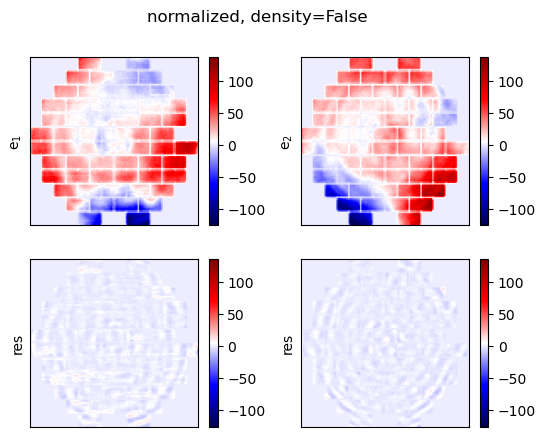

In [96]:
Hnorm = []
for w in weights:
    H, _, _= np.histogram2d(fov_x, fov_y, bins=(100,100), weights=w,density=False)
    Hnorm.append(H)
    
vmin = min(h.min() for h in Hnorm)
vmax = max(h.max() for h in Hnorm)
norm = Normalize(vmin=vmin, vmax=vmax)

for i,w,l in zip(range(1,5),weights,labels):
    plt.subplot(2,2,i)
    H, _, _= np.histogram2d(fov_x, fov_y, bins=(100,100), weights=w,density=False)
    im = plt.imshow(H,cmap=cmap,norm=norm)#, vmin=-10, vmax=10)
    plt.ylabel(l)
    plt.xticks([])
    plt.yticks([])
    plt.colorbar(im)
    
plt.suptitle("normalized, density=False")

Text(0.5, 0.98, 'not normalized, density=False')

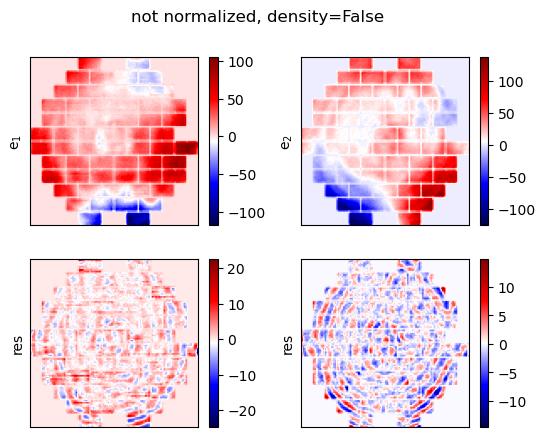

In [97]:
Hnorm = []
for w in weights:
    H, _, _= np.histogram2d(fov_x, fov_y, bins=(100,100), weights=w,density=False)
    Hnorm.append(H)
    
vmin = min(h.min() for h in Hnorm)
vmax = max(h.max() for h in Hnorm)
norm = Normalize(vmin=vmin, vmax=vmax)

for i,w,l in zip(range(1,5),weights,labels):
    plt.subplot(2,2,i)
    H, _, _= np.histogram2d(fov_x, fov_y, bins=(100,100), weights=w,density=False)
    im = plt.imshow(H,cmap=cmap,norm=None)#, vmin=-10, vmax=10)
    plt.ylabel(l)
    plt.xticks([])
    plt.yticks([])
    plt.colorbar(im)
    
plt.suptitle("not normalized, density=False")